1. Realice una carga de la base de datos de acciones de google denominada como "goog" en yfinance, para ese analisis debe realizar la media movil de 30 y 60 días para graficarlas de modo subsiguiente. Además de ello debe ubicar en otro gráfico el momento indicado para comprar y vender acciones en el año 2022



In [ ]:
pip install yfinance

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib as npl
from matplotlib import cycler

In [ ]:
#Realizar grafico predeterminado
colors = cycler('color',
                ['#669FEE', '#66EE91', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('figure', facecolor='#313233')
plt.rc('axes', facecolor="#313233", edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors,
       labelcolor='gray')
plt.rc('grid', color='474A4A', linestyle='solid')
plt.rc('xtick', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('legend', facecolor="#313233", edgecolor="#313233")
plt.rc("text", color='#C9C9C9')

In [ ]:
#es para yahoo finance
def preprocessing_yf(symbol):

  #Importar datos
  df = yf.download(symbol).dropna()

  #Renombrar
  df.columns=["open", "high", "low", "close","adj close", "volume"]
  df.index.name='time'

  #Elimino columna adj close
  del df['adj close']

  return df

In [ ]:
df=preprocessing_yf("goog")

[*********************100%***********************]  1 of 1 completed


In [ ]:
df

,open,high,low,close,volume
time,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,184645512
...,...,...,...,...,...
2023-05-22,123.510002,127.050003,123.449997,125.870003,29760200
2023-05-23,124.930000,125.419998,123.050003,123.290001,24477900
2023-05-24,121.879997,122.750000,120.750000,121.639999,23087900


In [ ]:
#Media movil de 30 y 60 días
df['SMA fast']=df['close'].rolling(30).mean()
df['SMA slow']=df['close'].rolling(60).mean()

<Axes: xlabel='time'>

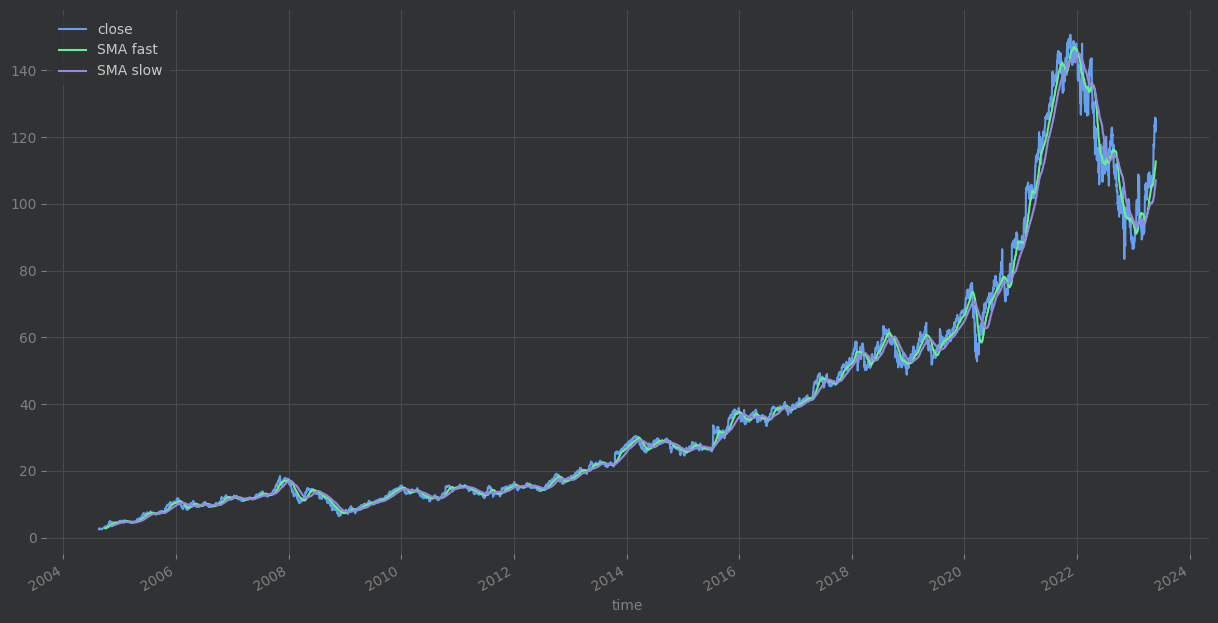

In [ ]:
#Gráfica de resultados
df[['close','SMA fast','SMA slow']].plot(figsize=(15,8))

<Axes: xlabel='time'>

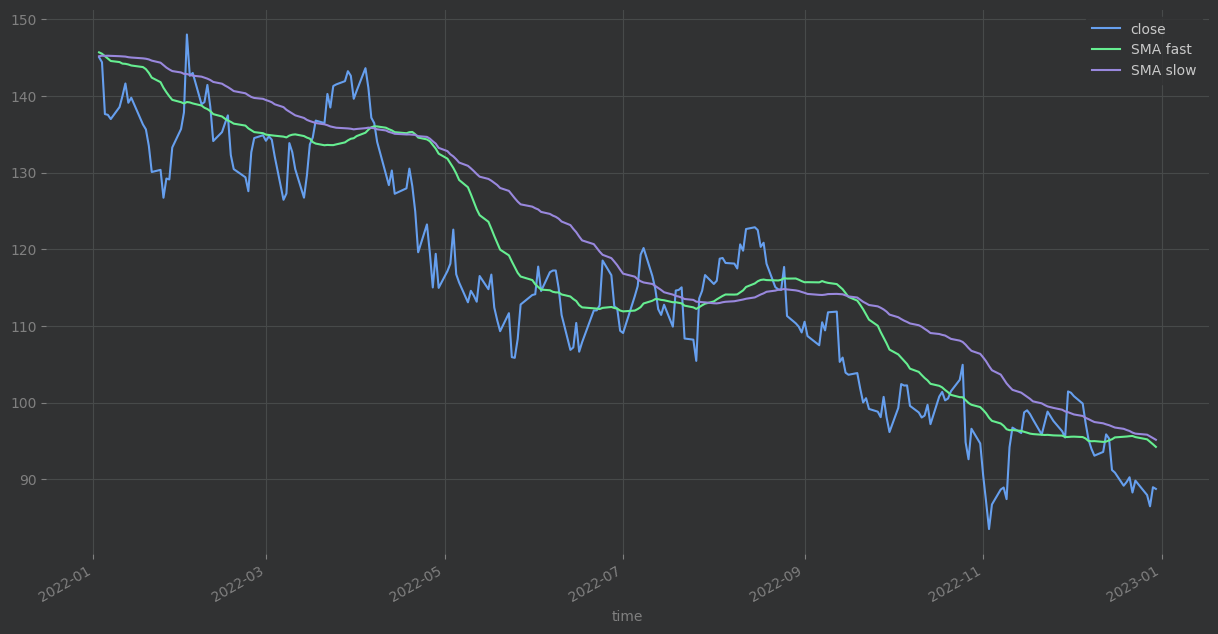

In [ ]:
#Gráfico del año 2022
df[['close','SMA fast','SMA slow']].loc['2022'].plot(figsize=(15,8))

In [ ]:
df['position']=np.nan

#Crear condicion

df.loc[(df['SMA fast'] > df['SMA slow']),'position']= 1
df.loc[(df['SMA fast'] < df['SMA slow']),'position']= -1

In [ ]:
year='2022'

idx_open = df.loc[df["position"] == 1].loc[year].index
idx_close = df.loc[df["position"] == -1].loc[year].index

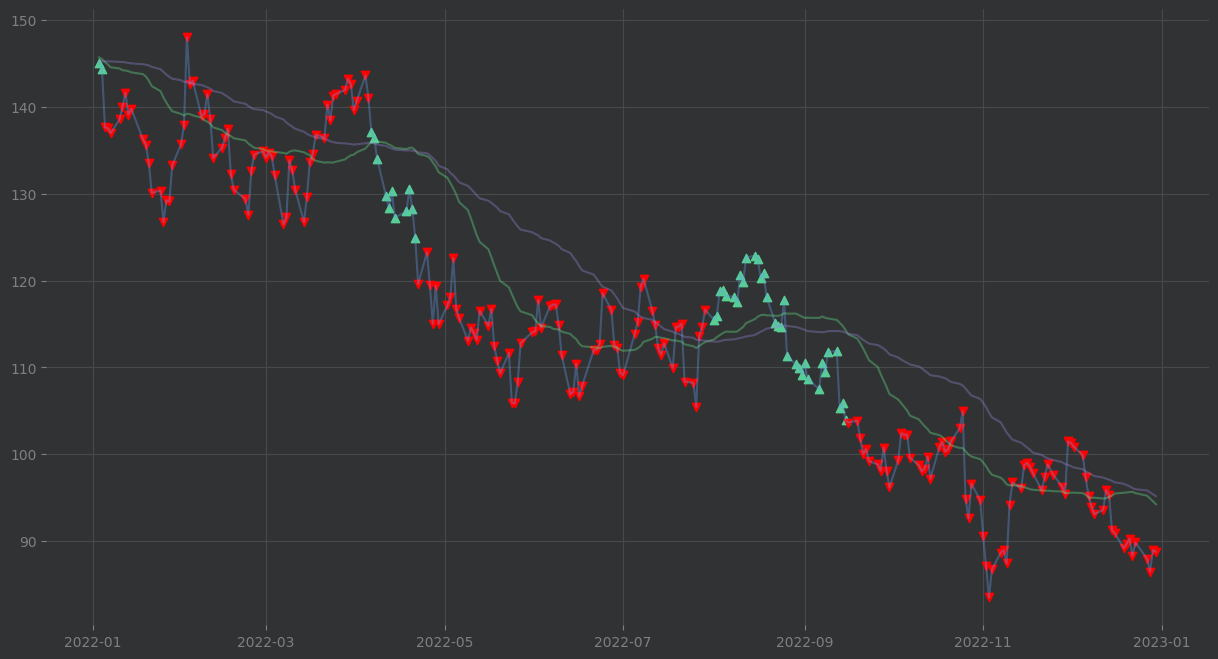

In [ ]:
#Adaptar el gráfico
plt.figure(figsize=(15,8))

#Representación de compra o venta
plt.scatter(idx_open, df.loc[idx_open]["close"].loc[year], color= "#57CE95", marker="^")
plt.scatter(idx_close, df.loc[idx_close]["close"].loc[year], color= "red", marker="v")

#Añado otros componentes gráficos relaciionados con resistencia
plt.plot(df['close'].loc[year].index, df['close'].loc[year], alpha=0.35)
plt.plot(df['close'].loc[year].index, df['SMA fast'].loc[year], alpha=0.35)
plt.plot(df['close'].loc[year].index, df['SMA slow'].loc[year], alpha=0.35)

plt.show()

2. Realice un web Scrapping de esta página: https://www.geeksforgeeks.org/python-programming-language/ 
   Deberá extraer la respuesta mediante beautifulSoup y separarlo por html, además debe buscar e imprimir las partes donde diga  "onclick"

In [2]:
pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import requests
from bs4 import BeautifulSoup
url= 'https://www.geeksforgeeks.org/python-programming-language/'
respuesta = requests.get(url)

In [5]:
soup= BeautifulSoup(respuesta.text, 'html.parser')

In [6]:
print(soup)

<!DOCTYPE html>
<html lang="en-us" prefix="og: http://ogp.me/ns#"><head><meta charset="utf-8"/><meta content="Data Structures,Algorithms,Python,Java,C,C++,JavaScript,Android Development,SQL,Data Science,Machine Learning,PHP,Web Development,System Design,Tutorial,Technical Blogs,Interview Experience,Interview Preparation,Programming,Competitive Programming,SDE Sheet,Job-a-thon,Coding Contests,GATE CSE,HTML,CSS,React,NodeJS,Placement,Aptitude,Quiz,Computer Science,Programming Examples,GeeksforGeeks Courses,Puzzles" name="keywords"/><meta content="width=device-width,initial-scale=1,maximum-scale=1" name="viewport"/><link href="https://media.geeksforgeeks.org/wp-content/cdn-uploads/gfg_favicon.png" rel="shortcut icon" type="image/x-icon"/><link href="https://fonts.googleapis.com" rel="preconnect"/><link crossorigin="" href="https://fonts.gstatic.com" rel="preconnect"/><meta content="#308D46" name="theme-color"/><meta content="https://media.geeksforgeeks.org/wp-content/cdn-uploads/gfg_200x2

In [7]:
#buscar e imprimir las partes donde diga "onclick"
onclick=soup.findAll(onclick=True)
onclick

[<button class="gcse-search__btn not-expanded" onclick="setSearchBarFocus()">
 <i class="gfg-icon gfg-icon_search gfg-icon_white gcse-search__icon"></i></button>,
 <button class="savePersonalNoteButton" onclick="saveUserPersonalNote()">Save</button>]